# Affine Transformation

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

array([[[255, 255, 255],
        [217, 217, 217],
        [254, 254, 254],
        ...,
        [233, 233, 233],
        [235, 235, 235],
        [235, 235, 235]],

       [[203, 203, 203],
        [133, 133, 133],
        [153, 153, 153],
        ...,
        [144, 144, 144],
        [140, 140, 140],
        [140, 140, 140]],

       [[245, 245, 245],
        [148, 148, 148],
        [155, 155, 155],
        ...,
        [156, 156, 156],
        [153, 153, 153],
        [153, 153, 153]],

       ...,

       [[235, 235, 235],
        [116, 116, 116],
        [138, 138, 138],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [106, 106, 106]],

       [[234, 234, 234],
        [114, 114, 114],
        [136, 136, 136],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]],

       [[232, 232, 232],
        [113, 113, 113],
        [135, 135, 135],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [113, 113, 113]]], dtype=uint8)
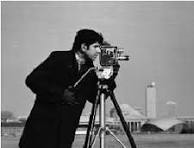

In [71]:
img1 = cv2.imread("test1.png")
img2 = cv2.imread("test2.png")
img1
img2


Assume variables and affine matrix

In [72]:
m11, m12, xt = 1.0, 0.5, 10
m21, m22, yt = 0., 1.0, 10

aff_mat = np.array([
    [m11, m12, xt],
    [m21, m22, yt],
    [0, 0, 1]])

inv_aff = np.linalg.inv(aff_mat)

In [73]:
inv_aff

array([[ 1.33333333, -0.66666667, -6.66666667],
       [-0.66666667,  1.33333333, -6.66666667],
       [ 0.        ,  0.        ,  1.        ]])

Affine Transform Function

In [74]:
def transform(img):
    h,w = img.shape[0],img.shape[1]
    out = np.zeros_like(img)

    for j in range(h):
        for i in range(w):
            out_coord = np.array([i, j, 1])
            x_in, y_in, _ = inv_aff @ out_coord
            x_in = int(round(x_in))
            y_in = int(round(y_in))

            if 0 <= x_in < w and 0 <= y_in < h:
                out[j, i] = img[y_in, x_in]

    return out

Transformation


In [75]:
img1_transform = transform(img1)
cv2.imread("img1_transform", img1_transform)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [167, 167, 167],
        [163, 163, 163],
        [164, 164, 164]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [166, 166, 166],
        [163, 163, 163],
        [163, 163, 163]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [165, 165, 165],
        [166, 166, 166],
        [162, 162, 162]]], dtype=uint8)
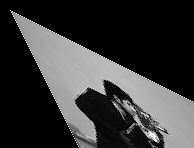

In [76]:
img2_transform = transform(img2)
cv2.imread("img2_transform", img2_transform)

# Output

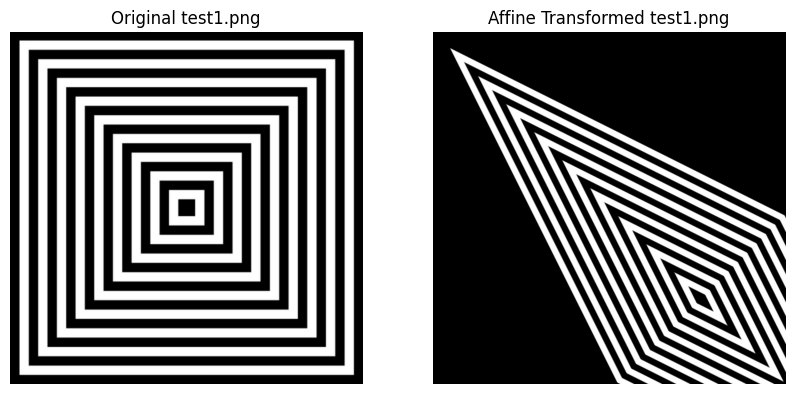

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original test1.png')
plt.imshow(img1)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Affine Transformed test1.png')
plt.imshow(img1_transform)
plt.axis('off')

plt.show()

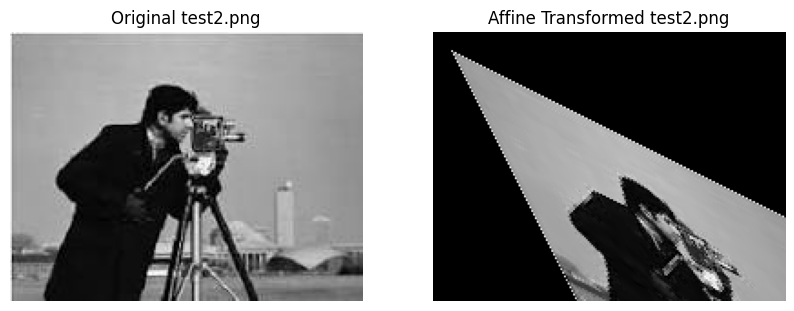

In [78]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original test2.png')
plt.imshow(img2)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Affine Transformed test2.png')
plt.imshow(img2_transform)
plt.axis('off')

plt.show()